A target is quality.

In [22]:
import numpy as np
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv('winequality-red.csv')

In [24]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Fixed acidity, free sulfur dioxide, total sulfur dioxide, sulphates has relatively much smaller 50% than mean - posibility of outliers what is seeing also in max value.
Any wine has 1, 2, 9 or 10 for quality. We have rates between 3 and 8. So we can't predict when wine has 1, 2, 9 or 10 (we can try, but it isn't good when it's impossible to test)

In [25]:
df['quality'] = df['quality'].transform(lambda x: x-3)

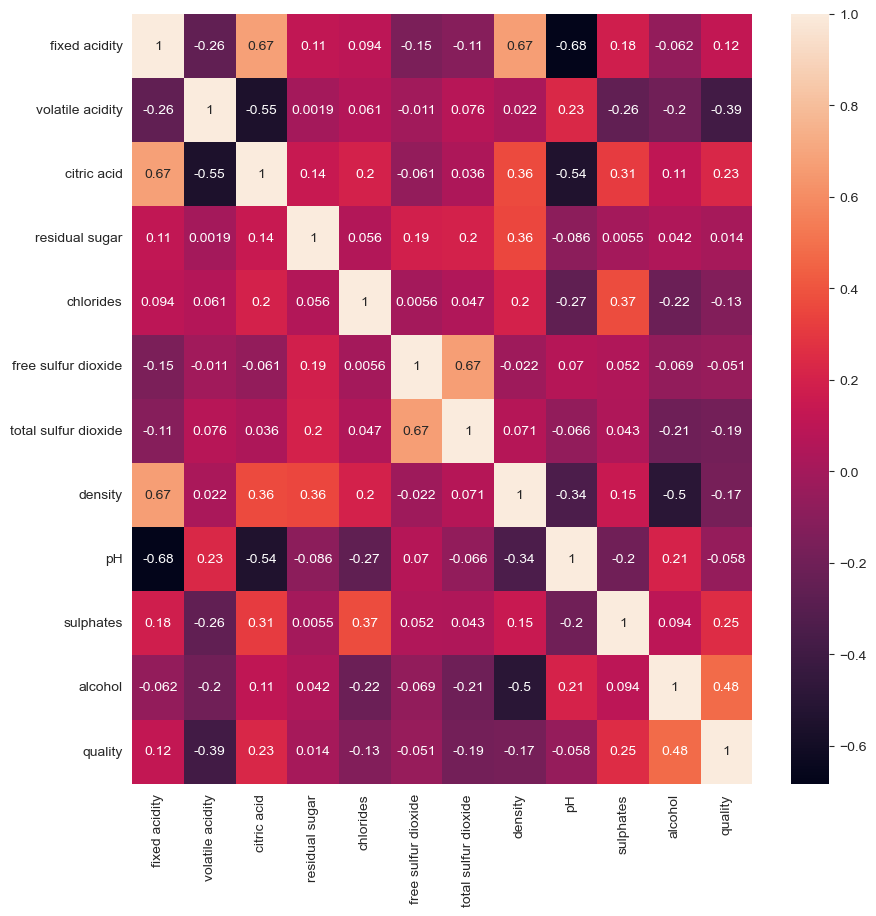

In [26]:
corr_matrix = df.corr()
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

I don't see any good correlation with quality. The best is alcohol, but it's only 0.48. The highest absolute correlation is -0.68 which is between fixed acidity and pH, but some are about 0.5 and higher which can cause problem with multicollinearity.

Delete for future:
volatile acidity vs citric acid - volatile acidity has multicollinearity only with citric acid and has better correlation with quality - volatile acidity stays

free sulfur dioxide vs total sulfur dioxide - the same number of multicollinearities but total sulfur dioxide has better correlation with quality - total sulfur dioxide stays

fixed acidity vs density - fixed acidity has more multicollinearities and worse correlation with quality - denisty stays

In [12]:
sns.set()
sns.pairplot(df)
plt.savefig('pairplot.png')
plt.show()

The most wines have quality 5 or 6, possible it's big bias. Fixed acidity has some linear/polynomial relation with citric acid, density and pH. Volatile acidity has linear relation with citric acid (negative relation). Density has linear/polynomial negative relation with alcohol.

In [13]:
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


No missing values.

Make the same EDA for 2 classes (bad <= 5 and good >= 6)

In [13]:
df = pd.read_csv('winequality-red.csv')

In [14]:
df['quality'] = df['quality'].transform(lambda x: 0 if x <= 5 else 1)

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.534709
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


The mean of quality is about 0.5 so classes are balanced now.

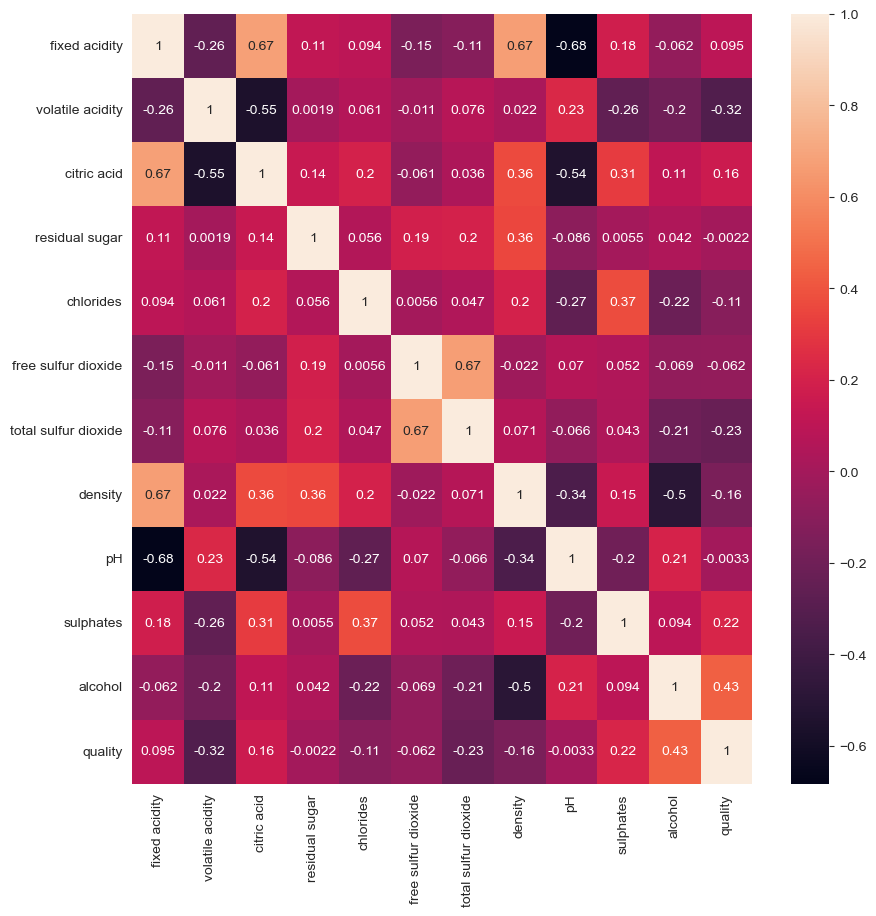

In [7]:
corr_matrix = df.corr()
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

After grouping qualities correlations with targets are worse. Now the best is 0.43 also with alcohol.

Let's work with outliers

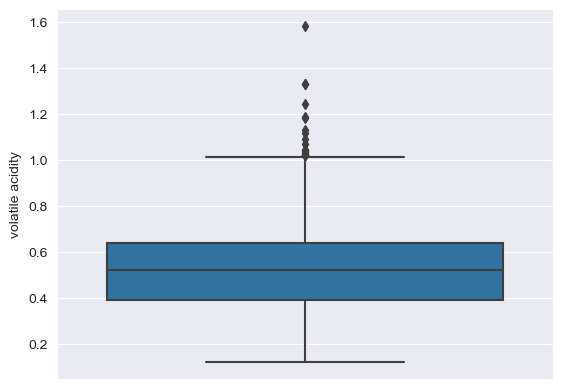

In [10]:
sns.boxplot(y=df['volatile acidity'])
plt.show()

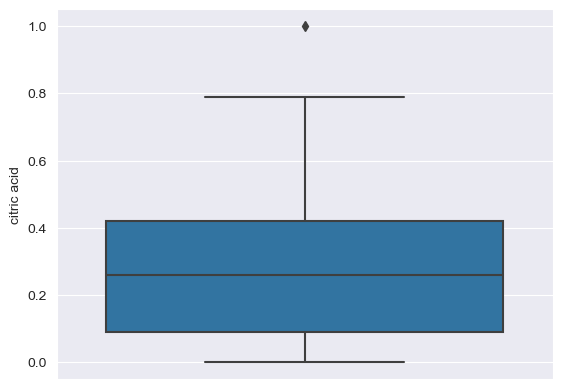

In [11]:
sns.boxplot(y=df['citric acid'])
plt.show()

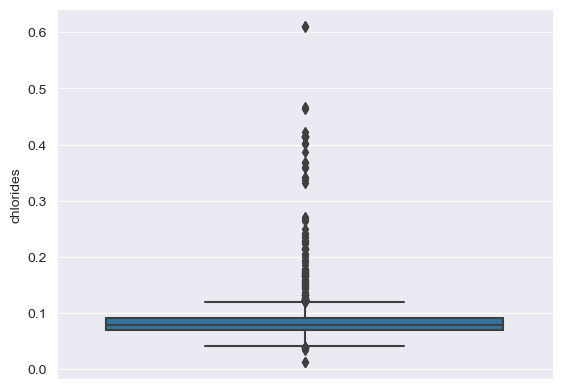

In [15]:
sns.boxplot(y=df['chlorides'])
plt.show()

<Axes: xlabel='chlorides', ylabel='Count'>

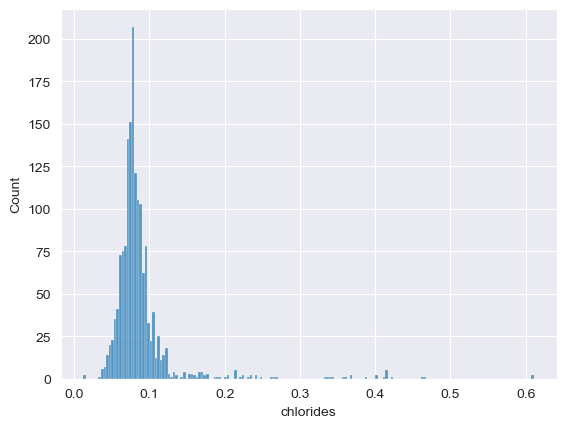

In [16]:
sns.histplot(df['chlorides'])
plt.show()

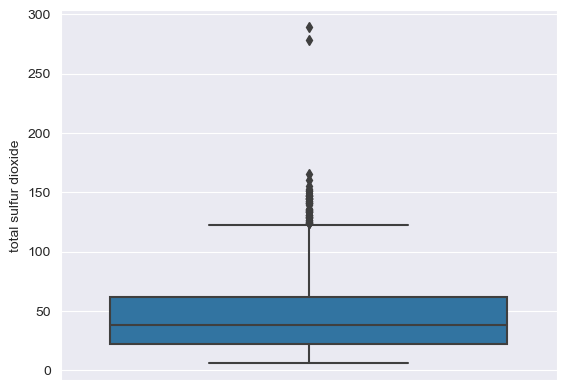

In [17]:
sns.boxplot(y=df['total sulfur dioxide'])
plt.show()

In [20]:
# delete outliers for future
df = df.drop(df[(df['volatile acidity'] > 1.0)].index)
df = df.drop(df[(df['citric acid'] > 0.8)].index)
df = df.drop(df[(df['chlorides'] > 0.15)].index)
df = df.drop(df[(df['total sulfur dioxide'] > 125)].index)